# MySQL With Docker

### Introduction
- Brief overview of MySQL and Docker.
- Importance of containerization in modern development.

MySQL is the single most popular relational database tool with a market share of over 40%. Compared to its competitors, PostgreSQL (16%) and Oracle Database (11%), its numbers look very good. 

MySQL is popular because it is simple and yet, powerful. Here are its best features:

- **Relational**: follows the relational model and uses SQL to manage databases
- **Open-source (GNU license)**: the community loves it. Companies love it
- **Scalable**: can handle applications from small-sized to enterprise-level
- **Secure**: offers user authentication, access management and encryption
- **High-performance**: known for its speed and efficiency in handling complex queries and large volumes of data
- **Replication and backup**: has options for data replication and backup allowing for disaster recovery strategies

As for using MySQL inside Docker containers, well, that's just a match made in the clouds. If you have worked with Docker before, all its benefits apply to MySQL docker containers, too:

- **Isolation and consistency**: MySQL instance will be isolated from other software and dependencies, preventing potential royal conflicts
- **Portability**: with Docker, you can easily ship your MySQL environment into a container that you can share with anyone. This makes team collaboration a smooth process.
- **Version control**: Docker allows you to version your entire stack along with MySQL. This means, you can reproduce your environment at any time, facilitating development and testing.
- **Scalability and resource management**: With Docker, you can scale your MySQL application by easily allocating more resources like memory or CPU. 
- **Dependency management**: Docker encapsulates your MySQL instance, allowing you to manage different versions of it without bothering anything on your local machine.

This meme should sum up the most important features of Docker:
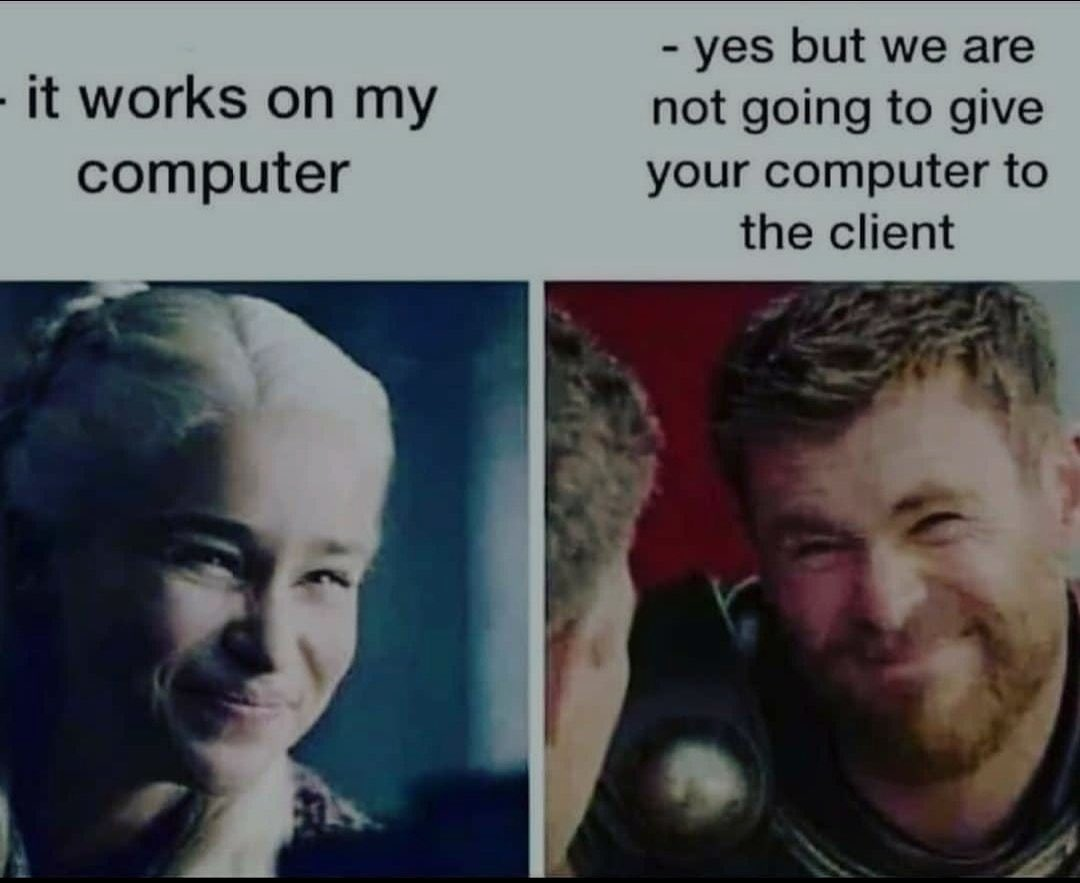

Today, you will learn the fundamentals for running MySQL in tandem with Docker. Let's get started!

### Prerequisites

As this article focuses on MySQL Docker containers, it has a few prerequisites to follow along:

1. Command line/terminal access: you need a local environment with a terminal access. If you are in a Jupyter environment like Colab, please, switch now. 
2. A running Docker instance: you should have Docker desktop already installed (instructions [here](https://www.datacamp.com/tutorial/docker-for-data-science-introduction)). When it is fully operational, the bottom left of the interface will feature a green baby whale:

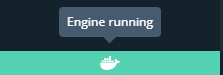

and the `docker --help` command works without errors on the terminal.

3. Basic familiarity with Docker: even though I will explain all the commands used in the article, [basic Docker understanding](https://www.datacamp.com/tutorial/docker-for-data-science-introduction) will significantly increase the benefits you can gain from this article. 
4. SQL: the same goes for SQL - I won't be explaining any SQL commands used in this article, as it will deviate us from the main topic. If your SQL skills are a bit rusty, you can revisit the most important topics [here](https://app.datacamp.com/learn/courses/introduction-to-sql).

### Use-case for the article

From now on, we will pretend that we are building the database-side of a primitive e-commerce website named cheapdata.xyz (fictitious). We will treat it as though the website is ready but it urgently needs a database to store information related to its services.

We won't go into the details of database design but only focus on how to start from scratch to having a running MySQL instance you can connect to start storing data. 

Let's roll.

### Downloading the official MySQL Docker Image

We will start by downloading the official MySQL Docker image with the following command:

```
$ docker pull mysql:latest
```

`docker pull` requires the name and the version of the image with `image:version` syntax. Using the keyword `latest` downloads the most recent stable release.

If you visit [the official MySQL image](https://hub.docker.com/_/mysql) page on Docker Hub, you can see many other versions for different purposes.

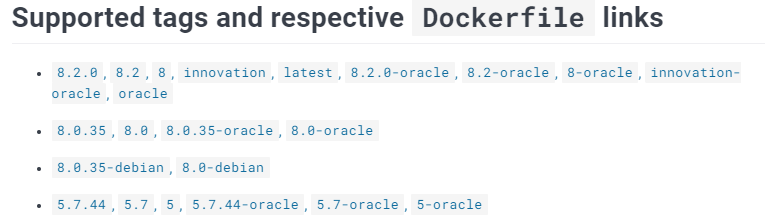

Here is how to download v8.2, as an example:

```
$ docker pull mysql:8.2
```

Once you download the image, it should be listed among your existing Docker images:

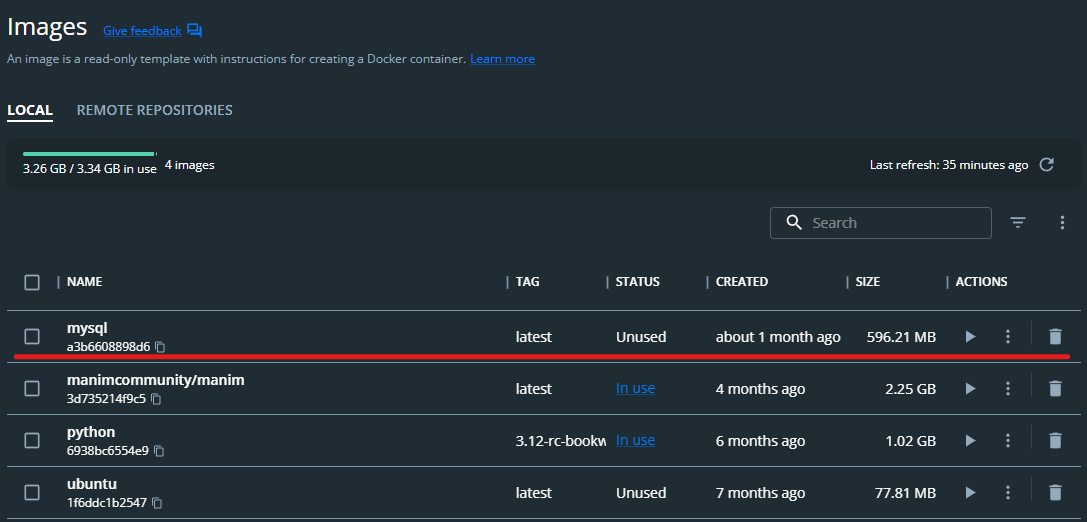

You can use the terminal to do the same:

```
$ docker images
```

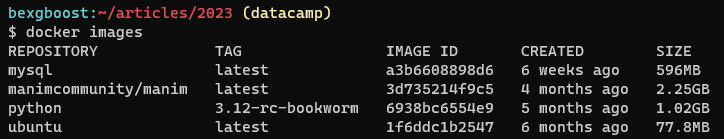

**Remember**: Docker images are blueprints for building containers. Just like a blueprint allows you to build a house, a Docker image contains all the necessary instructions and components to create a running instance of an application or service.

If you come from an OOP background, think of Docker images as classes. Just like creating a single class allows you to create multiple objects, Docker images allow you to create multiple containers off of them.

### Running and managing a MySQL server container

Now, let's create our first container from the `mysql` image. Here is the command we will use:

```
$ docker run --name test-mysql -e MYSQL_ROOT_PASSWORD=strong_password -d mysql
```

Explanation of the tags and keywords:
- `run`: creates a new container or starts an existing one
- `--name CONTAINER_NAME`: gives the container a name. The name should be readable and short. In our case, the name is `test-mysql`.
- `-e ENV_VARIABLE=value`: the `-e` tag creates an environment variable that will be accessible within the container. It is crucial to set `MYSQL_ROOT_PASSWORD` so that we can run SQL commands later from the container. Make sure to store your strong password somewhere safe (not your brain).
- `-d`: short for detached, the `-d` tag makes the container run in the background. If you remove this tag, the command will keep printing logs in your terminal session.
- `image_name`: the final argument is the image name the container will be built from. In this case, our image is `mysql`.

If the command returns a long string of gibberish (the container ID), it means the container has started. You can check its status with `docker ps`: 

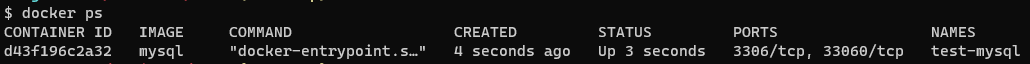

**Remember**: a Docker container is a powerful emulator of an operating system. You can treat your MySQL containers as separate Linux instances running on top of your host machine with MySQL already installed. This means you can do almost anything you can do inside of it using the terminal apart from just running SQL queries.

To access the terminal inside your container, you can use the following command:

```
$ docker exec -it container_name bash
```

### Connecting to the MySQL server container locally

The `run` command we've run starts a MySQL server inside the created container. A MySQL server includes all the trinkets to create and manage databases using SQL. But before we can run SQL queries, we should connect to the server using a **MySQL client**. 

A client establishes a connection to the server to run SQL. All MySQL containers come with a built-in client in the form of the `mysql` terminal command. Let's use it to connect to the server inside `test-mysql`:

1. Open the bash terminal of `test-mysql`:

```
$ docker exec -it test-mysql bash
```

2. Connect to the client as a root user:

```
$ mysql -u root -p
Enter password: ...

mysql> 
```

We are using the `-u` tag to specify the username (`root`) and adding the `-p` tag to securely enter our securely stored password when prompted. 

![](images/hello_world.gif)

It is possible to connect to the server outside the container, as well. For example, to connect from your host machine, you can use a compatible MySQL client that requires manual installation. The command `mysql` isn't built-in to any operating system.

To install MySQL and its client on Windows, you can following the instructions [here](https://dev.mysql.com/doc/refman/8.0/en/windows-installation.html).

For Mac, you can use Homebrew:

```
$ brew install mysql
```

For Linux or WSL2 (my choice), you can use `sudo`:

```
$ sudo apt update
$ sudo apt install mysql-client

```

Now, if you are running the container, stop and remove it:

```
$ docker stop test-mysql
test-mysql

$ docker rm test-mysql
```

Next, we will restart the container by mapping a port from the container to a port on our local machine:

```
$ docker run -d --name test-mysql -e MYSQL_ROOT_PASSWORD=strong_password -p 3307:3306 mysql
```

This command does the following:

- `-p 3307:3306`: Maps the container's port 3306 (the default port for MySQL) to your local port 3307. This means any traffic sent to your local port 3307 will be forwarded to the container's port 3306 and your MySQL server will be accessible on that port.
- `-d`: Runs the container in detached mode again.
- `--name test-mysql`: Reuses the same container name "test-mysql".
- `-e MYSQL_ROOT_PASSWORD=strong_password`: Sets the root password again for the MySQL server.
- `mysql`: Specifies the Docker image to run, which is the official MySQL image.

After terminal outputs a new ID for the container, we can check the port mappings:

```
$ docker port test-mysql
3306/tcp -> 0.0.0.0:3307
```

It is successful! Now, from your local machine you can connect to the server on port 3307 using `mysql` client:

```
$ mysql --host=127.0.0.1 --port=3307 -u root -p
Enter password:

Welcome to the MySQL monitor.  Commands end with ; or \g.
Your MySQL connection id is 8
Server version: 8.2.0 MySQL Community Server - GPL

Copyright (c) 2000, 2023, Oracle and/or its affiliates...
```

### Configuring the MySQL Container
- How to find and modify configuration files.
- Creating and mounting custom config files.
- Persisting data even after container is stopped or removed

You can configure MySQL containers for so many settings using a configuration file. Usually, the file will be stored inside one of the following directories of the container:

- `/etc/mysql/`
- `/etc/mysql/conf.d`
- `/etc/mysql/mysql.conf.d`

The directories change from image to image. But the standard file name and extension for a config file is `my.cnf`. If the file doesn't exist in any of the directories listed above, this means the container requires a custom configuration file. This is the case for our `test-mysql` container:

```
$ ls /etc/mysql/conf.d/ # Returns no output
```

In situations like these, we have to take the following careful steps:

1. Create an empty `my.cnf` file inside the container:

```
$ docker exec -it test-mysql bash # Open the terminal of the container
$ touch /etc/mysql/conf.d/my.cnf
```

2. Create a similar empty file locally (on your machine):

```
$ sudo mkdir -p /etc/docker/test-mysql # create the dir first
$ sudo touch /etc/docker/test-mysql/my.cnf
```

3. Stop and remove the container:

```
$ docker stop test-mysql; docker rm test-mysql
```

4. Restart the container by linking the two empty `.cnf` files:

```
$ docker run \
    --name test-mysql \
    -v /etc/docker/test-mysql:/etc/mysql/conf.d \
    -e MYSQL_ROOT_PASSWORD=strong_password \
    -d mysql
```

We are writing a new tag: `-v` which is short for _volume_. The tag can be used to link directories between the container and the local machine. In Docker lingo (and other places), this process is called **mounting**.

So, in the command above, we are _mounting_ the local `/etc/docker/test-mysql` directory to the container's `/etc/mysql/conf.d` directory. This will link the contents of both directories. Any changes made in either directories will be reflected in both. 

This means that we can edit the `my.cnf` file on our local machine to change the configurations of our Docker container. And the best part is that the modified configurations will persist in our local machine even after the container is stopped or removed. It will be reusable. 

So, after this step, what kind of configurations we can change? The answer depends on your use case. We will cover them below.

### What options should you configure?

While the default configuration for MySQL Docker containers works for many common scenarios, you should modify certain settings to optimize performance, security, and resource usage. Here are some of the most commonly changed configuration options:

Performance:

- **innodb_buffer_pool_size**: This setting determines the amount of memory allocated to the InnoDB buffer pool, which caches frequently accessed data for faster retrieval. Increasing this value can improve performance for read-heavy workloads, but it also consumes more memory.
- **query_cache_size**: This setting controls the size of the query cache, which stores previously executed queries for faster re-execution. Increasing this value can improve performance for repetitive queries, but it also consumes more memory and might not be effective for dynamic queries.
- **thread_pool_size**: This setting determines the maximum number of concurrent connections the server can handle. Adjusting this value based on your expected traffic load can optimize resource utilization and prevent bottlenecks.

Security:

- **bind-address**: This option restricts the MySQL server to listen only on specific network interfaces, limiting access from unauthorized sources.
- **mysql_bind_host**: This setting allows binding the MySQL server to specific IP addresses instead of listening on all interfaces.
- validate_password_policy: This option enables stricter password requirements for improved security.

Resource Utilization:

- **max_connections**: This setting controls the maximum number of concurrent connections allowed. Adjusting this value can prevent resource exhaustion and ensure efficient server operation.
- **innodb_file_per_table**: This option stores each InnoDB table in a separate file, potentially improving performance but increasing storage space requirements.
- **innodb_io_capacity**: This option sets the estimated IOPS (Input/Output Operations Per Second) for the storage system, enabling the engine to optimize buffer pool usage and disk operations.

Other common modifications:

- **character_set_server**: This option sets the default character set for the server, ensuring consistent data encoding and handling.
- **collation_server**: This option determines the default collation rules used for character data sorting and comparison.
- **log_bin**: This option enables binary logging of server activity, which can be helpful for troubleshooting and replication.

To see the full list of configuration options, you can run the following command:

```
$ docker run -it --rm mysql:tag --verbose --help
```

### How to preserve the data stored in the container?

Persisting data stored in your MySQL containers is crucial for many reasons:

1. Data persistence: When you stop or remove a container, all data is lost, including your database. Decoupling the data from the container makes it always accessible.
2. Sharing data between containers: Detaching the data from the container allows multiple containers to have access to it. This way, you can avoid data duplication and simplify synchronization between projects that use the same data.
3. Portability and backup: persisted data can be easily backed up and shared independently, providing a reliable way to recover from data loss or accidental deletion.
4. Improved performance and scalability: By storing frequently accessed data to persistent storage like SSDs, you can improve the performance of your application compared to relying on the container's writable layer, which is typically slower.

The process is the one we've already seen - we are going to create a volume and mount it to where the data is stored in our container. Here are the steps:

1. Create a volume:

```
$ docker volume create test-mysql-data
```

The `volume create` command creates a dedicated storage on your local file system for the volume. After the volume is mounted, all container data will be linked to it.

2. Restart the container with the volume mounted:

```
$ docker stop test-mysql; docker rm test-mysql
$ docker run \
    --name test-mysql \
    -v test-mysql-data:/var/lib/mysql \
    -e MYSQL_ROOT_PASSWORD=strong_password \
    -d mysql
```

This time, the syntax is in this format: `-v volume_name:directory_in_container`. All created volumes should be mounted on `/var/lib/mysql` directory as specified in MySQL image docs. 

So, now, any databases or tables created inside `test-mysql` will be persisted locally, even after the container is stopped or removed.